In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

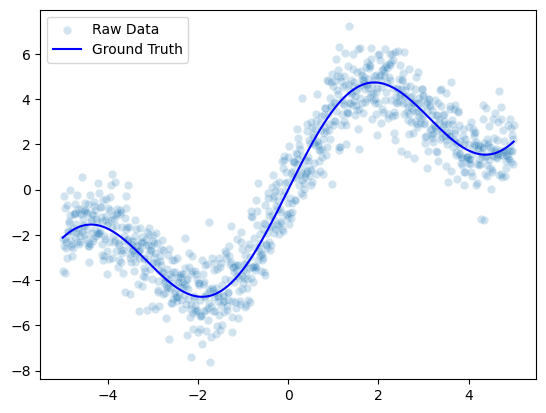

In [3]:
# Simulate data
sample_size = 1000
x = np.linspace(-5, 5, sample_size)
ground_truth = 3*np.sin(x) + x
noise = np.random.normal(0, 1.0, sample_size)
y = ground_truth + noise

# Scatter plot of raw data and ground truth function
sns.scatterplot(x=x, y=y, label='Raw Data', alpha=0.2)
sns.lineplot(x=x, y=ground_truth, color='blue', label='Ground Truth')

In [4]:
# Construct a PyTorch model
# there is a class called module, nn.Module, any NN model that I build, I need to define these two things, init and forward.
# if you're going to define a new class, you need a class constructor.
# side comment: I have linear regression with fancy feature engineering, you're taking 1 input and having the NN contruct 64 new features.
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(1, 1000) # one input, 64 outputs
        self.layer2 = nn.ReLU() # pass through ReLU, first activation
        self.layer3 = nn.Linear(1000, 1000) # this layer will have 64 inputs, 64 outputs, plus biases, so 64x65 parameter right here
        self.layer4 = nn.ReLU() # second activation
        self.layer5 = nn.Linear(1000, 1) # 

    def forward(self, x): # member function just has to have self as the first argument, python boilerplate stuff
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        return x

model = SimpleNN() # instantiate the model here as an instance of this new class
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01) # Adam, ADAgrad with momentum ... changing the learning rate over.  Starting with a learning rate of 0.01.



In [5]:
# Training
x_tensor = torch.tensor(x.reshape(-1, 1), dtype=torch.float32) # cast training features and outcomes as the Pytorch data type we need
y_tensor = torch.tensor(y.reshape(-1, 1), dtype=torch.float32)

epochs = 100
for epoch in range(epochs):
    optimizer.zero_grad() # zero gradients
    predictions = model(x_tensor) # when I pass x to the model object, its calling the forward method, equivalently could say model.forward()
    loss = criterion(predictions, y_tensor)
    loss.backward() # 300 years of calculus and 1000 lines of code in one line (backward pass, backpropagation)
    optimizer.step()

    if (epoch) % 10 == 0:
        print(f"Epoch: {epoch+1}, Loss: {loss.item()}")
        y_pred = predictions.detach().numpy()
        sns.scatterplot(x=x, y=y, label='Raw Data', alpha=0.2)
        sns.lineplot(x=x, y=ground_truth, color='blue', label='Ground Truth')
        sns.lineplot(x=x, y=y_pred.squeeze(), color='orange', label='Fitted Function')
        plt.legend()
        plt.show()

NameError: name 'x' is not defined